<a href="https://colab.research.google.com/github/Prashikta/GRIPJULY21/blob/main/GRIP21_July_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Name: Prashikta Gupta***

# **GRIP (Graduate Rotational Internship Program)** - The Sparks Foundation

## **Exploratory Data Analysis** - Retail

### **Problem Statement:**
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit.

#### **Import libraries**

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### **Reading dataset**

In [2]:
#Reading dataset from the link
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv")

In [3]:
data.shape

(9994, 13)

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Checking for duplicate data

In [9]:
data.duplicated().sum()

17

In [10]:
#dropped the duplicate rows
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### **Exploratory Data Analysis**

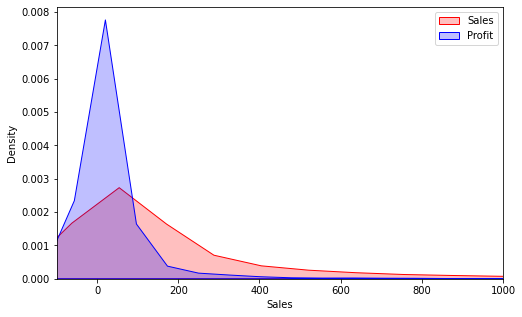

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(data["Sales"], color='red', label='Sales', shade=True)
sns.kdeplot(data["Profit"], color='blue', label='Profit', shade=True)
plt.xlim([-100,1000])
plt.legend()

It tell us that profit is higher than sales.

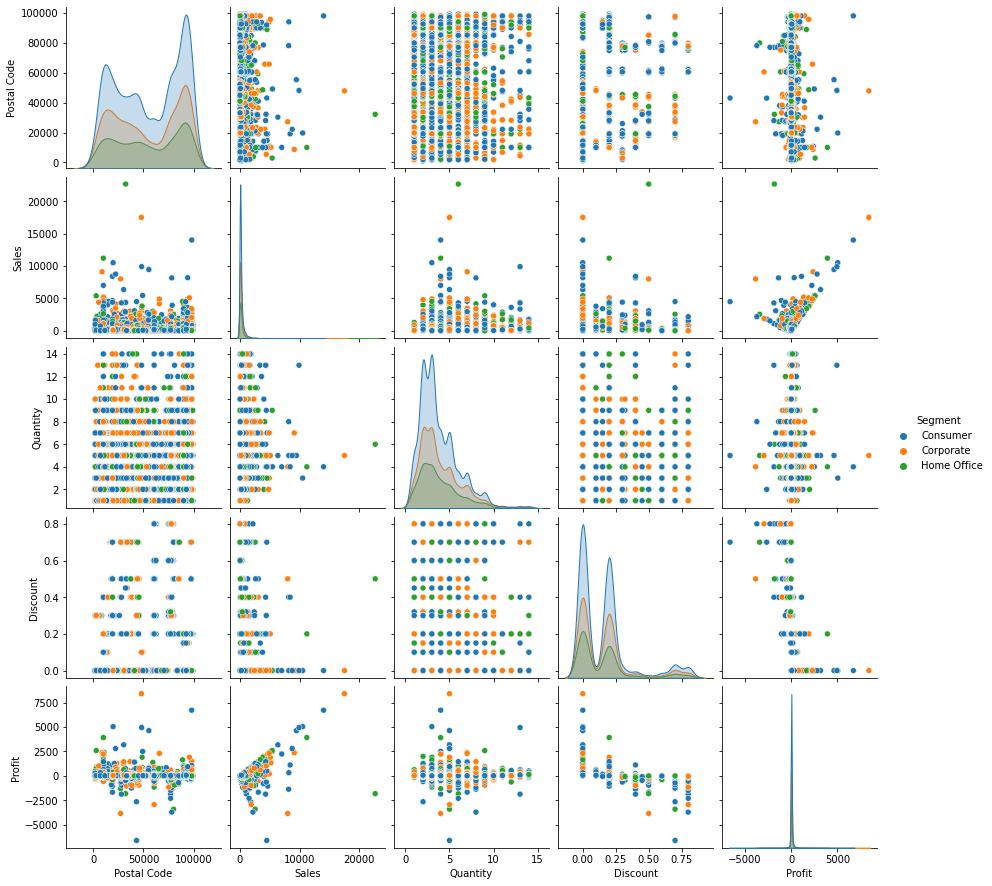

In [12]:
#Pairplot based on segment column
sns.pairplot(data, hue="Segment")

In [13]:
df = data.corr()

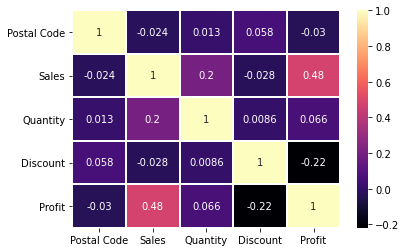

In [14]:
# heat map showing the correlation between the features
sns.heatmap(df, annot=True, cmap="magma", linewidths=1, linecolor="white")

From this you can say profit and sales has positive correlation with each other i.e; if the sales increase profit increases and vice versa.

Also, the discount and profit are negatively correlated.

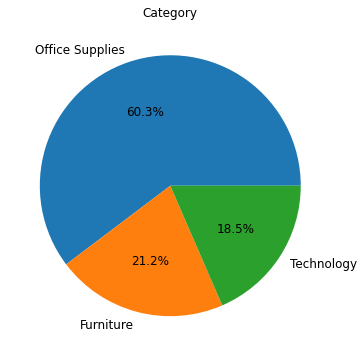

In [15]:
#Pie chart for category column
plt.figure(figsize = (6,6))
textprops = {"fontsize":12}
plt.title('Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

Office supplies have highest demand.

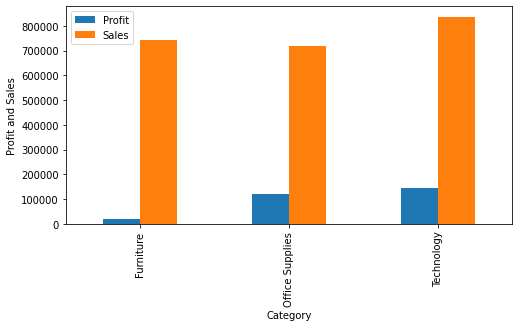

In [16]:
#Bar plot to check profit and sales in each category
data.groupby('Category')[['Profit','Sales']].agg(sum).plot(kind='bar',figsize=(8,4))
plt.ylabel('Profit and Sales')
plt.show()

It tell us that furniture is generating very less profit.

Text(0.5, 1.0, 'Count of Segment by Category and Segment')

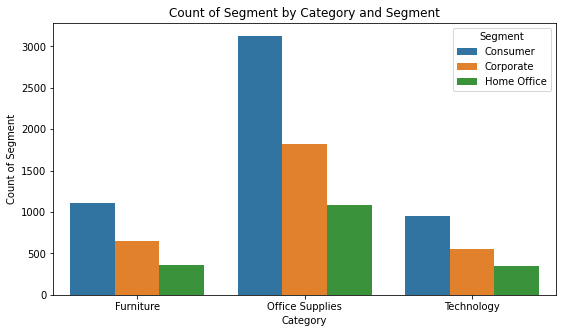

In [17]:
#Count plot to check purchases in each segement for each category
plt.figure(figsize=(9,5))
sns.countplot(x='Category',hue='Segment',data=data)
plt.ylabel('Count of Segment')
plt.title('Count of Segment by Category and Segment')

The highest purchases are in consumer segment whereas home office segment has the least purchases in each category. We need to focus on the corporate and home office segment as well to increase our sales and profit.

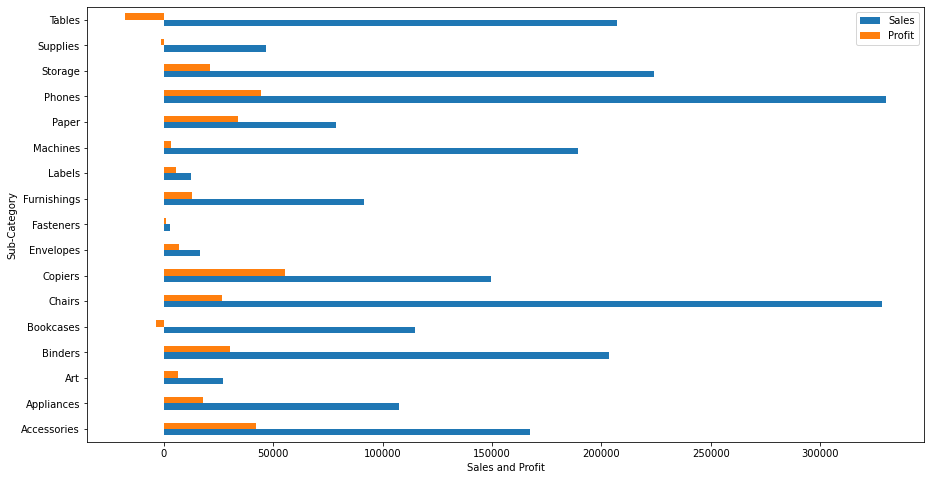

In [18]:
#Horizontal Bar plot for sub category
data.groupby('Sub-Category')[['Sales','Profit']].agg(sum).plot(kind='barh',figsize=(15, 8))
plt.ylabel('Sub-Category')
plt.xlabel('Sales and Profit')
plt.show()

We have 3 weak areas Tables, Supplies and Bookcases as we are facing loss on the sales of these items. On the sales of tables we are facing highest loss.

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

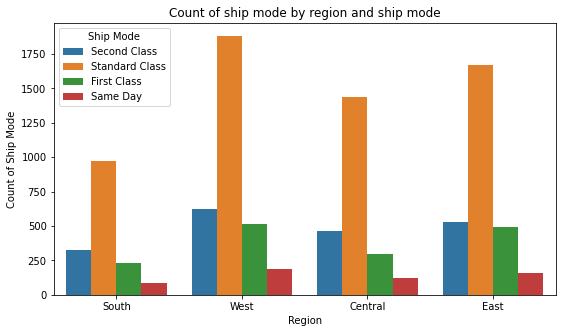

In [19]:
#Count plot for region and ship mode
plt.figure(figsize=(9,5))
sns.countplot(x='Region',hue='Ship Mode',data=data)
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

Least sales are in Southern region, we can attract this region by offering more discount. Standard mode of shipment is opted by most of the customers in each region.

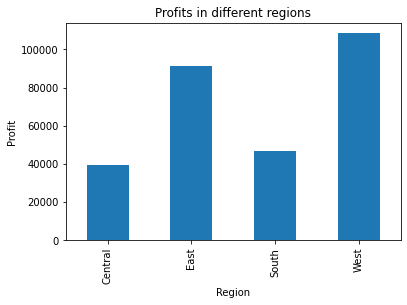

In [20]:
#Bar plot to check which region has least profit
data.groupby('Region')['Profit'].agg(sum).plot(kind='bar')
plt.ylabel('Profit')
plt.title('Profits in different regions')
plt.show()

Central and Southern region are generating less profit as compared to the Eastern and Western Region. Increase the sales in Central and Southern region in order to generate more profit in these region.

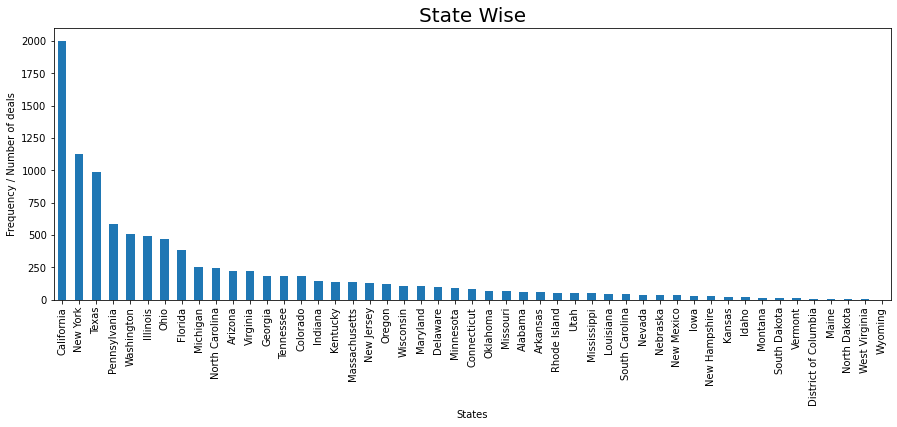

In [21]:
#Bar plot for state
data["State"].value_counts().plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise', fontsize = 20)
plt.show()

State wise California has highest sales. Few states like North Dakota, Wyoming and West Virginia have less or no sales at all. To generate more profit we have to increase our sales in Texas and New York where we have potential customers.

### **Conclusion**
The weak areas where one can work to make more profit are:

1.   We should limit the sales of furniture and increase that of office supplies and technology as furtinute is generating very less profit as compared to its sales.
2.   We have highest purchases in consumer segment but we should also concentrate on corporate and home office segments to increase our sales and profit.
3.   In the sub-categories we are facing huge loss on the sale of tables so its sale should be minimized.
4.   The sales and profit in Southern and Central region are less so we should give more incentives like discount in these states in order to increase sales, hence profit will increase.
5.    Few states like North Dakota, Wyoming and West Virginia have less or no sales at all so we also need to focus on these state.
6.   After the highest sales in California, we have high value of potenial customers in Texas and New York so we should concentrate more on these states to generate more profit.